# About this Project
This dataset has been taken from the Kaggle. The goal of this notebook is to accurately predict whether or not an adult makes more than 50000 US Dollars in an year on the basis of the feautures given.

# About the Dataset
1.Age: Describes the age of individuals. Continuous.

2.Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3.fnlwgt: final weight. In other words, this is the number of people the census believe the entry represents..

○ Integer greater than 0

4.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5.education-num: Number of years spent in education. Continuous.

6.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10.sex: Female, Male.

11.capital-gain: Continuous.

12.capital-loss: Continuous.

13.hours-per-week: Continuous.

14.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15.salary: >50K,<=50K

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#load dataset
df_main = pd.read_csv(r'/content/adult.csv')

In [3]:
df_main.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df_main.info() #Identification of data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_main.shape #Size of the dataset

(48842, 15)

In [6]:
#numerical stats
df_main.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Non-Graphical Univariate Analysis:

In [7]:
results=pd.DataFrame(df_main.value_counts())#To get the count of unique values

In [8]:
results

0
age workclass fnlwgt education    educational-num marital-status     occupation        relationship  race               gender capital-gain capital-loss hours-per-week native-country income   
21  Private   243368 Preschool    1               Never-married      Farming-fishing   Not-in-family White              Male   0            0            50             Mexico         <=50K   3
25  Private   195994 1st-4th      2               Never-married      Priv-house-serv   Not-in-family White              Female 0            0            40             Guatemala      <=50K   3
              308144 Bachelors    13              Never-married      Craft-repair      Not-in-family White              Male   0            0            40             Mexico         <=50K   3
43  Private   195258 HS-grad      9               Married-civ-spouse Craft-repair      Husband       White              Male   0            0            40             United-States  >50K    2
21  Private   250051 Some-college 10              Never-married      Prof-specialty    Own-child     White              Female 0            0            10             United-States  <=50K   2
...                                                                                                                                                                                           ..
44  Private   159580 12th         8               Divorced           Transport-moving  Not-in-family White              Female 0            0            40             United-States  <=50K   1
              159297 HS-grad      9               Married-civ-spouse Exec-managerial   Wife          Asian-Pac-Islander Female 0            0            40             ?              >50K    1
              157765 HS-grad      9               Divorced           Machine-op-inspct Not-in-family White              Female 0            0            40             United-States  <=50K   1
              157614 HS-grad      9               Divorced           Sales             Own-child     White              Male   0            0            38             United-States  <=50K   1
17  ?         27251  11th         7               Widowed            ?                 Own-child     White              Male   0            0            40             United-States  <=50K   1

[48790 rows x 1 columns]

In [9]:
#checking any duplicate values
df_main.duplicated().any()

True

In [10]:
df=df_main.drop_duplicates()

In [11]:
df.shape

(48790, 15)

# To get the list & number of unique values:

In [12]:
results2=pd.DataFrame(df_main.nunique())#To get the unique values

In [13]:
results2

,0
age,74
workclass,9
fnlwgt,28523
education,16
educational-num,16
marital-status,7
occupation,15
relationship,6
race,5
gender,2


In [14]:
#missing values
df_main.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Data Preprocessing

In [15]:
df_main.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [16]:
df_main =df_main.replace('?', np.NaN)

In [17]:
df_main.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
#Checking null values:
df_main.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

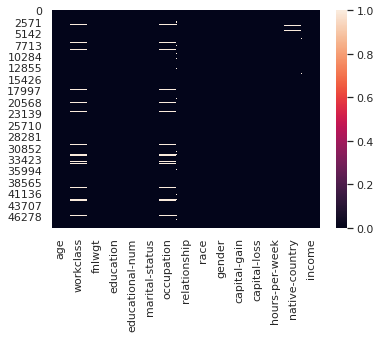

In [19]:
sns.heatmap(df_main.isnull())

In [20]:
#checking the percentage of missing values
print('% of missing values: ', (df_main.isnull().sum()*100/len(df_main)))

% of missing values:  age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64


In [21]:
#filter out the column which has most number of zero values.
(df_main == 0).sum(axis=0)

age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain       44807
capital-loss       46560
hours-per-week         0
native-country         0
income                 0
dtype: int64

In [22]:
data_main=df_main.drop(['capital-gain', 'capital-loss'], axis = 1)

In [23]:
data_main

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [24]:
data_main.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Graphical Univariate Analysis:

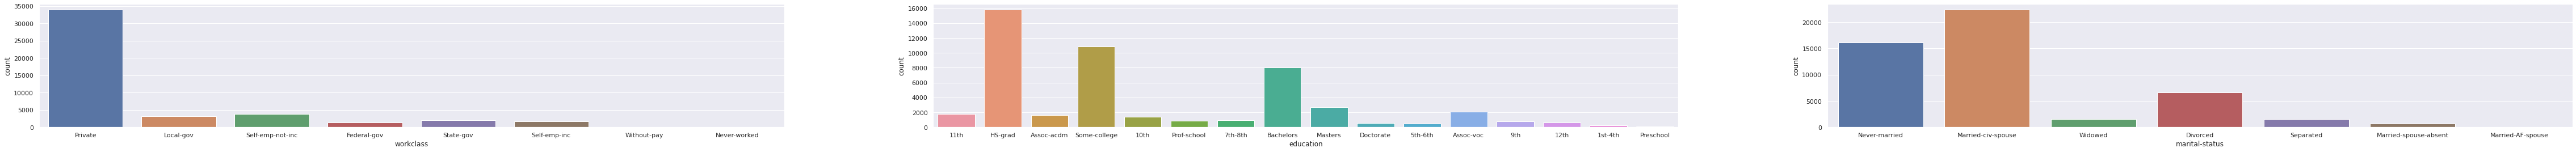

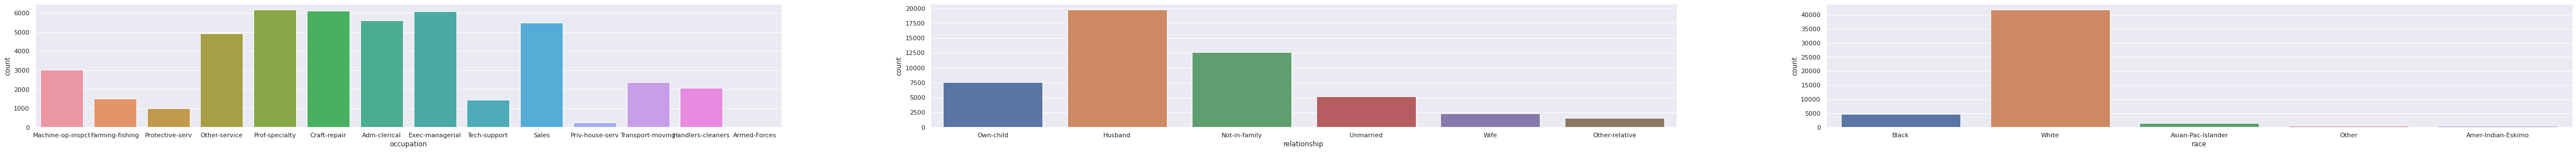

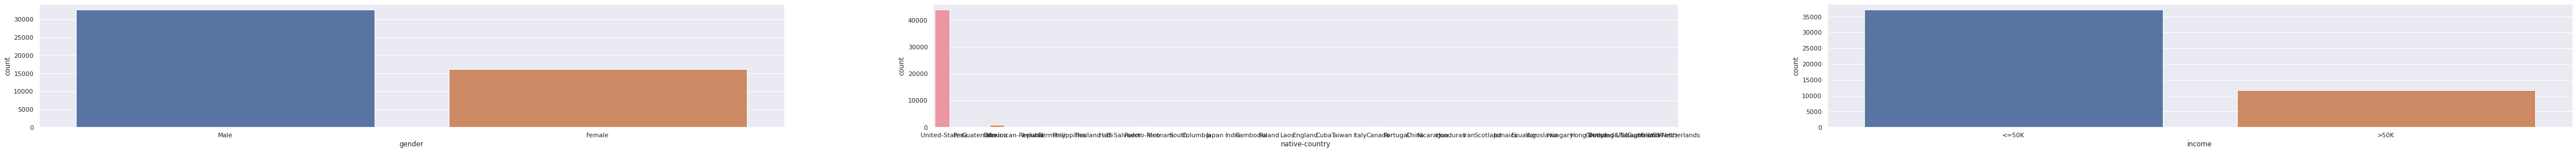

In [25]:
cat_cols = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country', 'income']
i=0
while i < 9:
    fig = plt.figure(figsize=[80,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,3,1)
    sns.countplot(x=cat_cols[i], data=data_main)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,3,2)
    sns.countplot(x=cat_cols[i], data=data_main)
    i += 1
    
    #ax3.title.set_text(cat_cols[i])
    plt.subplot(1,3,3)
    sns.countplot(x=cat_cols[i], data=data_main)
    i += 1
    
    plt.show()

In [26]:
# replacing zero values with the mode of the column
for col in ['workclass', 'occupation', 'native-country']:
        data_main[col].fillna(data_main[col].mode()[0], inplace=True)

In [ ]:
data_main.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K


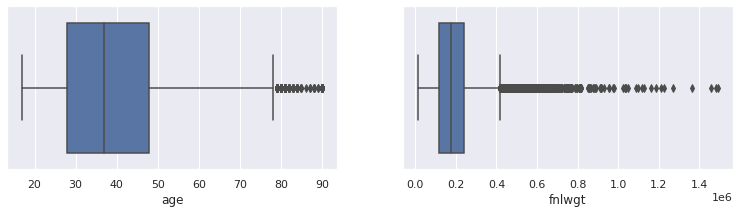

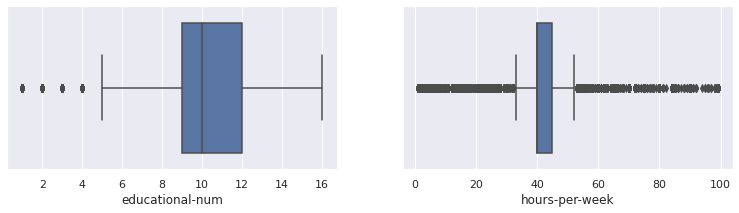

In [27]:
num_cols = ['age','fnlwgt','educational-num','hours-per-week']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data_main)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data_main)
    i += 1
    
    plt.show()

In [28]:
data_main[data_main['age'] > data_main['age'].quantile(0.99)].sort_values(by="age",ascending=False)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
10735,90,Local-gov,188242,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,40,United-States,>50K
38501,90,Private,52386,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,40,United-States,<=50K
15088,90,Private,197613,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,>50K
13958,90,Private,272752,Some-college,10,Never-married,Other-service,Own-child,White,Male,10,United-States,<=50K
30440,90,Local-gov,187749,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,20,Philippines,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30662,75,Self-emp-inc,125197,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,26,United-States,<=50K
13603,75,Local-gov,73433,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,40,Canada,<=50K
39369,75,Self-emp-not-inc,165968,Assoc-voc,11,Widowed,Exec-managerial,Not-in-family,White,Female,30,United-States,<=50K
19248,75,Private,188612,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,40,United-States,<=50K


In [29]:
data_main[data_main['fnlwgt'] > data_main['fnlwgt'].quantile(0.99)].sort_values(by="fnlwgt",ascending=False)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
7974,27,Private,1490400,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,<=50K
30730,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,25,United-States,<=50K
34419,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,40,United-States,<=50K
33020,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,8,United-States,<=50K
31850,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341,40,Private,510072,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,55,United-States,>50K
44502,25,Private,509866,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,78,United-States,<=50K
26091,24,Private,509629,HS-grad,9,Never-married,Other-service,Own-child,White,Female,25,United-States,<=50K
45238,21,Private,509629,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,35,United-States,<=50K


In [30]:
data_main[data_main['educational-num'] > data_main['educational-num'].quantile(0.25)].sort_values(by="educational-num",ascending=False)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
36474,49,Private,133969,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Other,Male,50,United-States,>50K
39148,33,Federal-gov,331615,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,>50K
27245,56,Self-emp-inc,205601,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,70,United-States,>50K
6205,33,State-gov,25806,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,20,United-States,<=50K
12362,34,Private,87535,Doctorate,16,Never-married,Exec-managerial,Not-in-family,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12829,23,Private,213902,Some-college,10,Never-married,Other-service,Unmarried,White,Female,20,United-States,<=50K
21117,57,Federal-gov,97837,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Male,48,United-States,>50K
12825,23,State-gov,1117718,Some-college,10,Never-married,Protective-serv,Not-in-family,Black,Male,30,United-States,<=50K
12821,50,Private,320510,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,60,United-States,>50K


In [31]:
data_main[data_main['hours-per-week'] > data_main['hours-per-week'].quantile(0.25)].sort_values(by="hours-per-week",ascending=False)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
35334,27,Private,40295,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,99,United-States,<=50K
43139,66,Private,262285,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,99,United-States,<=50K
6271,35,Private,124090,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,99,United-States,<=50K
13327,52,Self-emp-not-inc,284648,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,99,United-States,>50K
13368,42,Self-emp-inc,203233,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29161,56,Private,124137,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,41,United-States,<=50K
23900,30,Private,446358,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Male,41,United-States,<=50K
12221,54,Federal-gov,28683,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,41,United-States,>50K
8139,49,Federal-gov,105959,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,41,United-States,>50K


In [32]:
data_main[data_main['hours-per-week'] > data_main['hours-per-week'].quantile(0.75)].sort_values(by="hours-per-week",ascending=False)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11455,46,Self-emp-not-inc,246891,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,99,United-States,>50K
30874,27,Private,179915,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,99,United-States,<=50K
13327,52,Self-emp-not-inc,284648,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,99,United-States,>50K
44393,61,Private,158712,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,99,United-States,<=50K
39507,51,Self-emp-not-inc,88528,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27818,40,Private,226505,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,46,United-States,>50K
14868,33,Local-gov,203051,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,46,United-States,<=50K
30462,27,Private,189462,Masters,14,Never-married,Adm-clerical,Not-in-family,White,Female,46,United-States,<=50K
4936,23,Private,345577,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,46,United-States,<=50K


In [33]:
# changing the target to 0 and 1
data_main['income']=data_main['income'].map({'<=50K': 0, '>50K': 1})

In [34]:
data_main

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


# Bivariate/Multi-Variate Analysis


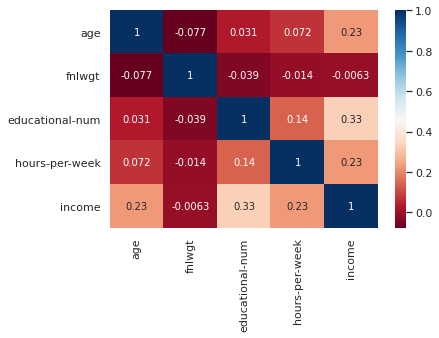

In [35]:
sns.heatmap(data_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [36]:
data_main.corr()['income']

age                0.230369
fnlwgt            -0.006339
educational-num    0.332613
hours-per-week     0.227687
income             1.000000
Name: income, dtype: float64

# Data Preparation

# Creating Dummies for Categorical Features

In [37]:
data_main.workclass.unique() #nominal Data

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [38]:
data_main['marital-status'].unique() #nominal Data

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [39]:
data_main.education.unique()#Ordinal Data 

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [40]:
data_main.occupation.unique()#nominal Data

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Prof-specialty', 'Other-service', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [41]:
data_main.relationship.unique() #nominal Data

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [42]:
data_main.race.unique() #nominal Data

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [43]:
data_main.gender.unique() #nominal Data

array(['Male', 'Female'], dtype=object)

In [44]:
data_main['native-country'].unique() #nominal Data

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [45]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'gender','native-country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(data_main[col])
    data_main[col] = label_encoder.transform(data_main[col])

In [46]:
 data_main

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,20,38,0


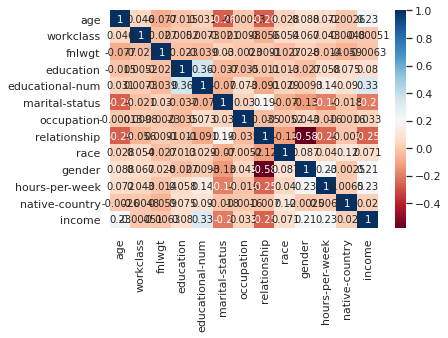

In [47]:
sns.heatmap(data_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [48]:
data_main.corr()['income']

age                0.230369
workclass         -0.000511
fnlwgt            -0.006339
education          0.080091
educational-num    0.332613
marital-status    -0.199072
occupation         0.032550
relationship      -0.253214
race               0.070934
gender             0.214628
hours-per-week     0.227687
native-country     0.020375
income             1.000000
Name: income, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score

In [50]:
# Separating target variable and its features
y =  data_main['income']
X =  data_main.drop('income',axis=1)

# To avoid Data leakage

In [51]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train-Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34189, 12)
x test:  (14653, 12)
y train:  (34189,)
y test:  (14653,)


# Converting to a balanced dataset

In [53]:
from imblearn.over_sampling import SMOTE
#transform the dataset
oversample = SMOTE()
X_new,y_new= oversample.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
pd.DataFrame(y_new).value_counts()

1    26043
0    26043
dtype: int64

# Model Creation/Evaluation

Applying classification models

1.Logistic Regression

2.KNN

3.Decision tree classifier

4.Random Forest classifier

5..XGB

6.SVM


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [56]:
CV =[]
train_accuracy = []
test_accuracy = []
precisionscore=[]
Recallscore=[]
f1score=[]
auc=[]

def  Income_Prediction(model,model_name):
    # Training model
    model.fit(X_new,y_new)
            
    # accuracy score of train set
    y_pred_train = model.predict(X_new)
    train_accuracy_model = accuracy_score(y_new,y_pred_train)
    train_accuracy.append(round(train_accuracy_model,2))
    
    # accuracy score of test set
    y_pred_test = model.predict(X_test)
    test_accuracy_model = accuracy_score(y_test,y_pred_test)
    test_accuracy.append(round(test_accuracy_model,2))
    
    # accuracy score of train set using Cross validation
    cross_val = cross_val_score(model ,X_new,y_new ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    #confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_test)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
    # Precison
    Precision = true_positive/(true_positive+false_positive)
    precisionscore.append(round(Precision,2))
    # Recall
    Recall = true_positive/(true_positive+false_negative)
    Recallscore.append(round(Recall,2)) 
    # f1
    f1=2*((Precision * Recall )) /(Precision + Recall)
    f1score.append(round(f1,2)) 
    # Area Under Curve
    auc_value = roc_auc_score(y_test,y_pred_test)
    auc.append(round(auc_value,4))
      # Printing results
    print("Train accuracy :",round(train_accuracy_model,2))
    print("Test accuracy :",round(test_accuracy_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("confusion_matrix:",conf_mat)
    print("Accuracy:",Accuracy)
    print("Precision:",Precision)
    print("Recall:",Recall)
    print("F1score:",f1)
    print("Train auc_value :",auc_value)
    
    
    # Plotting Graphs ROC & AUC CURVE
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    plt.plot(fpr, tpr, color='orange',label='ROC Curve  (AUC = %0.2f)' % (auc_value))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label=' Random ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# 1.Logistic Regression

In [57]:
from sklearn.linear_model  import  LogisticRegression

In [58]:
log_reg = LogisticRegression()

Train accuracy : 0.75
Test accuracy : 0.73
Train CV scores : [0.75052793 0.74848805 0.7469521  0.74733609 0.75280791]
Train CV mean : 0.75
confusion_matrix: [[8048 3064]
 [ 827 2714]]
Accuracy: 0.7344571077595031
Precision: 0.7242620590352772
Recall: 0.9068169014084507
F1score: 0.805323460249162
Train auc_value : 0.7453561071793161


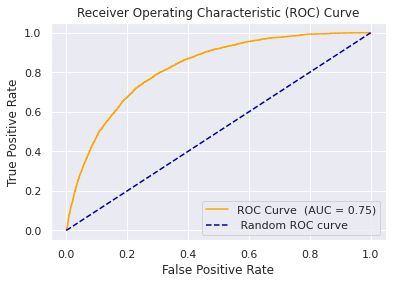

In [59]:
Income_Prediction(log_reg,"LogisticRegression.pkl")

# 2.KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()
# we are tuning the hyperparameters right now, we are passing the different values for both parameters
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
rnd_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter =10, cv=9)
rnd_search.fit(X_new,y_new)

RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]},
                   pre_dispatch='2*n_jobs', random_

In [62]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [63]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn_1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3)

Train accuracy : 0.92
Test accuracy : 0.76
Train CV scores : [0.84929929 0.85245272 0.86426034 0.86186042 0.86800422]
Train CV mean : 0.86
confusion_matrix: [[8654 2458]
 [1000 2541]]
Accuracy: 0.7640073705043335
Precision: 0.7787976961843053
Recall: 0.8964159933706236
F1score: 0.8334778002504093
Train auc_value : 0.748195798106273


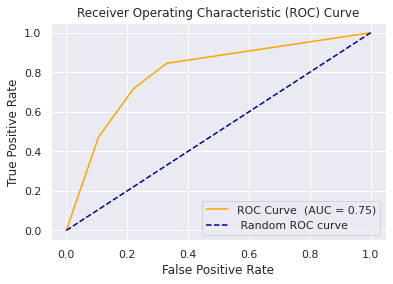

In [64]:
Income_Prediction(knn_1,"knn_1.pkl")

# **Decision tree**

In [65]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

Train accuracy : 1.0
Test accuracy : 0.77
Train CV scores : [0.75091188 0.80397427 0.86781223 0.86915619 0.87443602]
Train CV mean : 0.83
confusion_matrix: [[9226 1886]
 [1452 2089]]
Accuracy: 0.7721968197638709
Precision: 0.8302735781137509
Recall: 0.8640194793032403
F1score: 0.846810463515374
Train auc_value : 0.7101099604773781


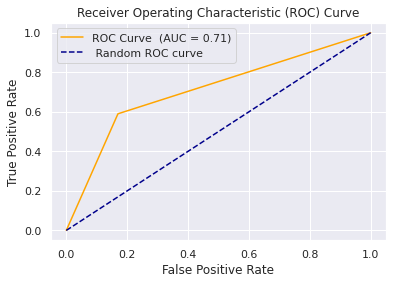

In [66]:
Income_Prediction(DT,"DT.pkl")

# **Random forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)
# we are tuning the hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
rnd_search = RandomizedSearchCV(RandomForestClassifier(), grid_param, n_iter =10, cv=9)
rnd_search.fit(X_new,y_new)

RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [68]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 130}

In [69]:
rand_clf_1=RandomForestClassifier(criterion= 'gini',
 max_depth = 19,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 7,
 n_estimators = 130,random_state=6)

Train accuracy : 0.93
Test accuracy : 0.82
Train CV scores : [0.81791131 0.84938082 0.89757128 0.89459537 0.89565134]
Train CV mean : 0.87
confusion_matrix: [[9314 1798]
 [ 871 2670]]
Accuracy: 0.8178529993857913
Precision: 0.8381929445644348
Recall: 0.9144820814923907
F1score: 0.8746771845799878
Train auc_value : 0.7961086157445162


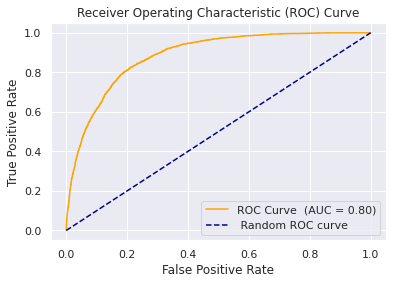

In [70]:
Income_Prediction(rand_clf_1,"rand_clf_1.pkl")

# **XGB**

In [71]:
import xgboost as xgb
from xgboost import XGBClassifier

In [72]:
xgb_1 = XGBClassifier(objective='binary:logistic')
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
}
rnd_search = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, n_iter =5, cv=5)
rnd_search.fit(X_new,y_new)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [73]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [74]:
xgb_2=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 100)

Train accuracy : 0.9
Test accuracy : 0.83
Train CV scores : [0.71462853 0.8313334  0.92934626 0.92704233 0.9312662 ]
Train CV mean : 0.87
confusion_matrix: [[9918 1194]
 [1317 2224]]
Accuracy: 0.8286357742441821
Precision: 0.892548596112311
Recall: 0.8827770360480641
F1score: 0.8876359242851388
Train auc_value : 0.7603098812247517


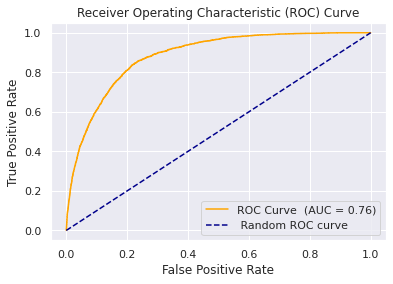

In [75]:
Income_Prediction(xgb_2,"xgb_2.pkl")

In [76]:
Technique = ["LogisticRegression","KNN","Decision tree","RandomForest","XGB"]
results=pd.DataFrame({'Model': Technique,'Train accuracy ': train_accuracy,'Test accuracy': test_accuracy,'CV score mean(Train)': CV,'AUC_value':auc,'Precision':precisionscore,'Recall':Recallscore,'f1 score':f1score})
display(results)

,Model,Train accuracy,Test accuracy,CV score mean(Train),AUC_value,Precision,Recall,f1 score
0,LogisticRegression,0.75,0.73,0.75,0.7454,0.72,0.91,0.81
1,KNN,0.92,0.76,0.86,0.7482,0.78,0.90,0.83
2,Decision tree,1.00,0.77,0.83,0.7101,0.83,0.86,0.85
3,RandomForest,0.93,0.82,0.87,0.7961,0.84,0.91,0.87
4,XGB,0.90,0.83,0.87,0.7603,0.89,0.88,0.89


# **Final model creation**

In [79]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,3,226802,1,7,4,6,3,2,1,40,38
1,38,3,89814,11,9,2,4,0,4,1,50,38
2,28,1,336951,7,12,2,10,0,4,1,40,38
3,44,3,160323,15,10,2,6,0,2,1,40,38
4,18,3,103497,15,10,4,9,3,4,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,38,38
48838,40,3,154374,11,9,2,6,0,4,1,40,38
48839,58,3,151910,11,9,6,0,4,4,0,40,38
48840,22,3,201490,11,9,4,0,3,4,1,20,38


In [82]:
finalmodel = RandomForestClassifier(criterion= 'gini',
 max_depth = 19,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 7,
 n_estimators = 130,random_state=6)

In [83]:
finalmodel.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [84]:
import numpy as np
finalmodel.predict([[23,3,226802,1,4,6,3,2,3,1,40,38]])

array([1])

In [85]:
import pickle 
filename = 'finalized_income_model.pk'
pickle.dump(finalmodel, open(filename, 'wb'))

In [86]:
loaded_model1 = pickle.load(open(filename, 'rb'))

In [87]:
loaded_model1.predict([[23,3,226802,1,4,6,3,2,3,1,40,38]])

array([1])

In [88]:
type(loaded_model1)

sklearn.ensemble._forest.RandomForestClassifier

In [89]:
loaded_model1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [90]:
X['native-country'].unique() #nominal Data

array([38, 28, 12, 25,  5, 20, 10, 29, 36, 13,  7, 32, 39, 34,  3, 23, 18,
        0, 30, 24,  8,  4, 35, 21,  1, 31,  2, 26, 15, 19, 33, 22,  6, 40,
       17, 16, 11, 37, 27,  9, 14])